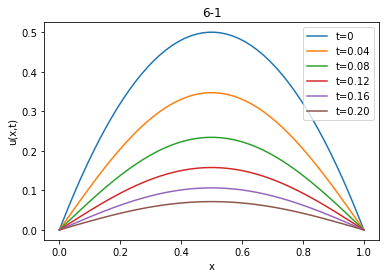

In [5]:
# Code6-1.py

import math

import matplotlib.pyplot as plt



T = 0.2

M = 1000

N = 50 

D = 1.0



h = 1.0/float(N)

tau = T/float(M)

alpha = D*tau/(h*h)

INTV = 200



def u0(x):

	return 2*x*(1 - x)



x, u, new_u = [0.0]*(N + 2), [0.0]*(N + 2), [0.0]*(N + 2)

ug = [0.0]*(N + 2)



for j in range(1, N + 1):

	x[j] = (j - 0.5)*h

	u[j] = u0(x[j])

x[0] = 0

x[N+1] = 1.0



t = 0

for j in range(1, N + 1):

	ug[j] = u[j]

plt.plot(x, ug, label="t="+str(t))



for k in range(1, M + 1):

	t = k*tau

	u[0] = -u[1]

	u[N+1] = -u[N]

	for j in range(1, N + 1):

		new_u[j] = alpha*u[j-1] + (1 - 2*alpha)*u[j] + alpha*u[j+1]



	for j in range(1, N + 1):

		u[j] = new_u[j] 



	if k%INTV == 0:

		for j in range(1, N + 1):

			ug[j] = u[j]

		plt.plot(x, ug, label="t="+str(('%.2f'%t)))



plt.title("6-1")

plt.xlabel("x")

plt.ylabel("u(x,t)")

plt.legend()

plt.show()

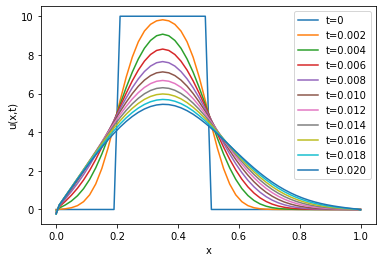

In [38]:
# Code6-1.py

import math

import matplotlib.pyplot as plt


#時間間隔
T = 0.02
#時間に関する刻み数
M = 1000

#空間に関する刻み幅
N = 50

#拡散係数
D = 1.0


#空間の幅が0<=x<=1より1÷N　参考書ではdx
h = 1.0/float(N)

#時間に関する幅　参考書ではdt
tau = T/float(M)

#参考書ではr = D*dt/(dx**2)の部分
#　→ FTCS法
alpha = D*tau/(h*h)

#インターバル　200回に1回グラフを書く
#一定間隔ごとにグラフを書く方が見やすいのでインターバル
INTV = 100

#時間と空間による広がりがあるので分布が時間によって
#どのように変化するのかを見る必要がある
#→アニメーションや重ね書きすることで比較はしやすい


#初期関数　初期値を与える関数
# キャンパスゼミと同じ関数に設定する
def u0(x):
    if 0.2<=x<=0.5:
        return 10
    else:
        return 0


#必要となるリストを用意して空間の幅にNの＋２分用意する
#ここでN+2としたのは境界条件のために両端を使うから
x, u, new_u = [0.0]*(N + 2), [0.0]*(N + 2), [0.0]*(N + 2)
ug = [0.0]*(N + 2)

#空間方向への計算
#両端を使わないためにrange(1,N+1)
for j in range(1, N + 1):
   

    #刻みの仕方が刻み幅がδxとすると
	# 1. xi = i＊δx　　　　格子点に値がある
	# → 時間方向はこちらを使う
	# 2. xi = (i-1/2)δx　格子点の中心に値がある
	#　→ 境界条件の扱いが自然になる　空間方向にはこちらを使う
	
	#今回は空間を考えるので2を採用
	x[j] = (j - 0.5)*h

	#初期関数に代入
	u[j] = u0(x[j])

#境界条件より両端を定義
x[0] = 0
x[N+1] = 1.0



t = 0

#グラフを書く前にuをugにコピーしておくことで境界条件が正確プロットできる
for j in range(1, N + 1):

	ug[j] = u[j]

plt.plot(x, ug, label="t="+str(t))


#時間方向への計算
for k in range(1, M + 1):
    t = k*tau
    u[0]=-u[1]
    u[N+1]=-u[N]
    #FTCS法の差分化された式
    for j in range(1, N + 1):
        new_u[j] = alpha*u[j-1] + (1 - 2*alpha)*u[j] + alpha*u[j+1]
    
    #求まったnew_uをuにコピーする
    for j in range(1, N + 1):
        u[j] = new_u[j] 

    #上のループ分がkからなのでkは1~M+1までループされる    
    if k%INTV == 0:
        for j in range(1, N + 1):
            ug[j] = u[j]
        plt.plot(x, u, label="t="+str(('%.3f'%t)))




plt.xlabel("x")

plt.ylabel("u(x,t)")

plt.legend()

In [39]:
alpha

0.05